In [32]:
# numpy
import numpy as np
# pandas
import pandas as pd
# pyplot
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns

%matplotlib inline

sns.set(color_codes=True)

In [2]:
# import tips dataset from seaborn
tips = sns.load_dataset("tips")

In [4]:
# set pandas dataframe for tips dataset
df = pd.DataFrame(data=tips)

# Exploratory Analysis

The head function allows for a peak at the dataset. We can see categorical (sex, smoker, day, and time) as well as numerical (total_bill, tip, size) data. We can infer from this snapshot that there are potential correlations between the the customer's tip and the other variables.

In [33]:
# head of tips dataset displaying first 5 rows of dataset
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The head function gives a glimpse at the dataset, showing the first five rows. It also shows the types of data in the dataset, 3 columns of numerical data and 3 columns of categorical data.

In [34]:
# last 5 rows of dataset
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


The tail function indicates that the dataset may be complete, with no gaps or missing data.

In [35]:
# Description of dataset
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The describe function shows the the distribution of the dataset which is illustrated below.

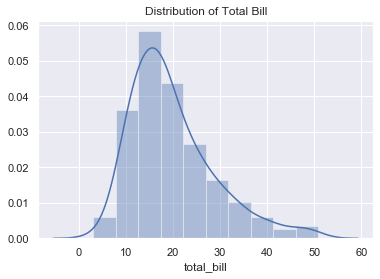

In [63]:
sns.distplot(df['total_bill'], bins=10);
plt.title("Distribution of Total Bill");

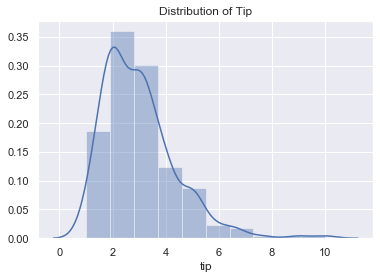

In [62]:
sns.distplot(df['tip'], bins=10);
plt.title("Distribution of Tip");

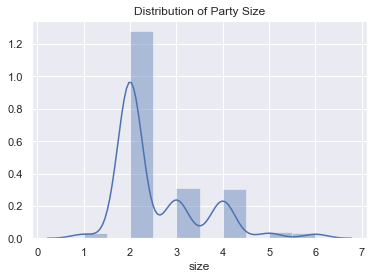

In [75]:
sns.distplot(df['size'], bins=10);
plt.title("Distribution of Party Size");

# Relationship between total bill and tip

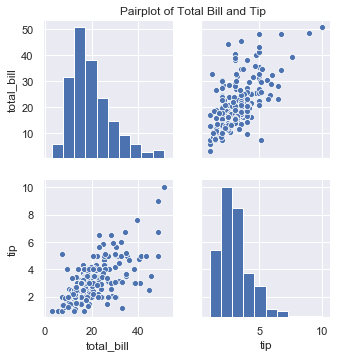

In [73]:
# pairplot of total bill and tip 
sns.pairplot(tips, x_vars=["total_bill", "tip"], y_vars=["total_bill", "tip"]);
plt.title("Pairplot of Total Bill and Tip",  {'horizontalalignment': "right"});

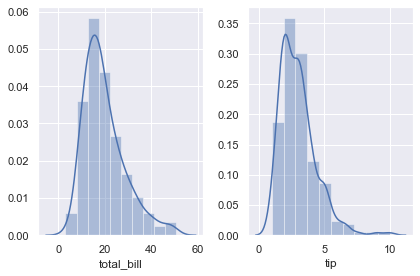

In [76]:
# histogram of total bill and tips side by side
plt.subplot(1,2,1)
sns.distplot(tips['total_bill'], bins=10);

plt.subplot(1,2,2)
sns.distplot(tips['tip'], bins=10);

plt.tight_layout()

The distribution of both the total bill and tip are similar indicating a correlation between the total amount spent and total amount tipped.

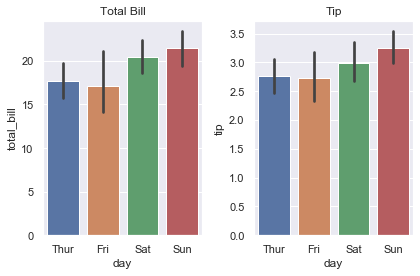

In [74]:
plt.subplot(1,2,1)
sns.barplot(x='day', y='total_bill', data=df)
plt.title("Total Bill");

plt.subplot(1,2,2)
sns.barplot(x='day', y='tip', data=df)
plt.title("Tip");
plt.tight_layout()

This barplot further illustrates the relationship between the total bill and tip. When comparing the tip on each day the tip rises and falls in correlation with the total bill each day.

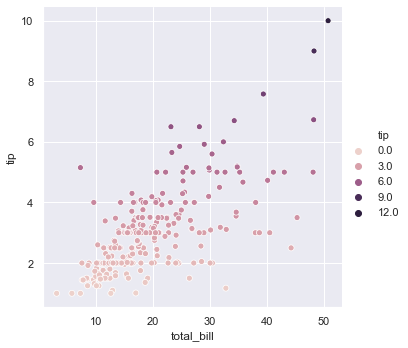

In [30]:
# scatterplot of total bill and tip
sns.relplot(x="total_bill", y="tip", hue="tip", data=df);


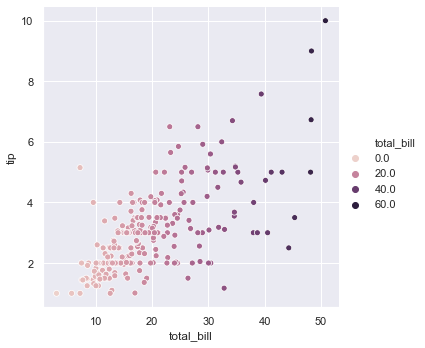

In [31]:
sns.relplot(x="total_bill", y="tip", hue="total_bill", data=df);

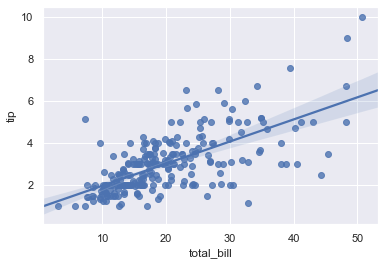

In [18]:
sns.regplot(x='total_bill', y='tip', data=df);

# Relationship between variables

## Sex 

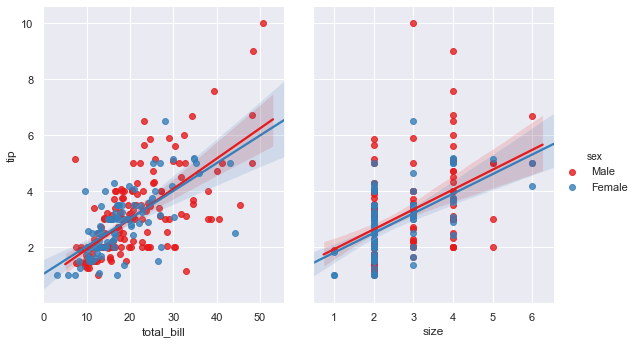

In [39]:
# pairplot with total bill and party six on x axis and tip on y axis
# hue distinguishing between male and female
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="sex", height=5, aspect=.8, kind="reg", palette="Set1");

Text about above plot 

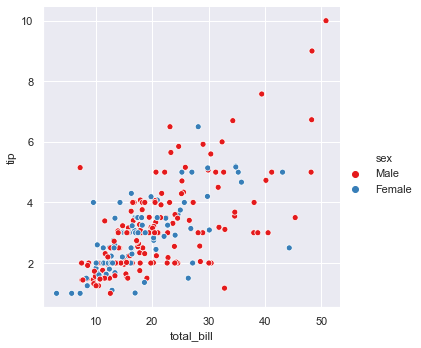

In [29]:
# scaterplot of toal bill and tip
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips, palette="Set1");

At a glance this plot indicates that men may have spent more and tippd more than women. 

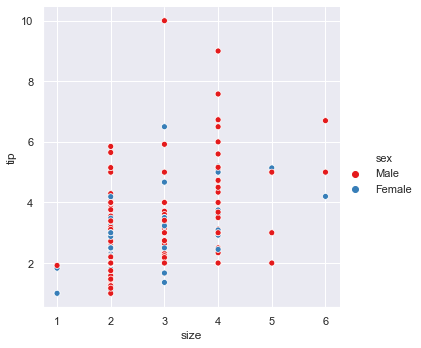

In [30]:
# scatterplot of party size and tip
sns.relplot(x="size", y="tip", hue="sex", data=tips, palette="Set1");

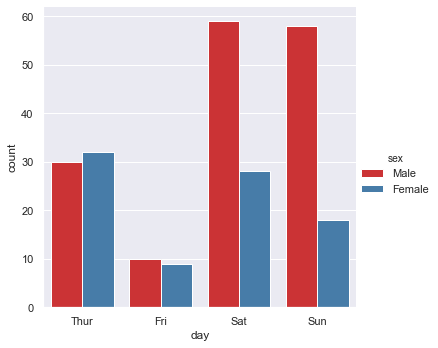

In [31]:
# count of number of customers each day separating male and female
sns.catplot(x="day", hue="sex", kind="count", data=tips, palette="Set1");

Here we can se that there is a significantly more men at the restaurant than women at the weekend. This will be explored further in the section related to day and time.

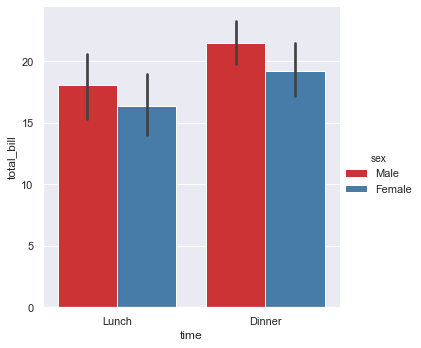

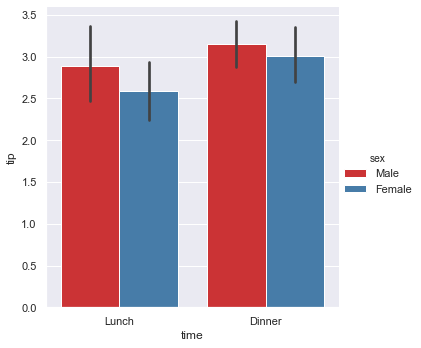

In [34]:
# bar chart of total bill differentiating between lunch/dinner, and male/female
sns.catplot(x="time", y="total_bill", hue="sex", kind="bar", data=tips, palette="Set1");

# bar chart of tip differentiating between lunch/dinner, and male/female
sns.catplot(x="time", y="tip", hue="sex", kind="bar", data=tips, palette="Set1");

This reiterates that men spend more and tip more than women overall. However, the significant difference between the number of men and women that attend at the weekend will be examined further to see if there is a relationship.

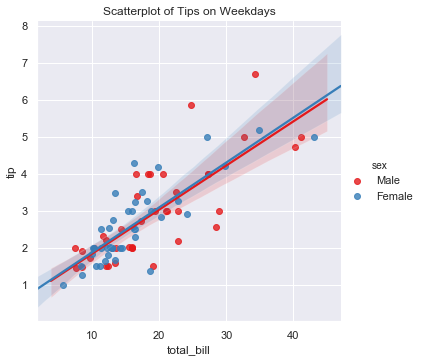

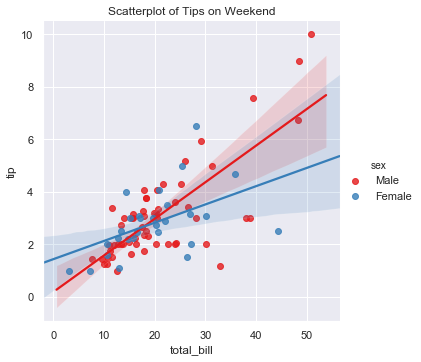

In [84]:
# linear regression model of weekday
weekday = df.loc[(df.day=="Thur")|(df.day=="Fri")]
sns.lmplot("total_bill", "tip", hue="sex", data=weekday, palette="Set1");
plt.title("Scatterplot of Tips on Weekdays");

# linear regression model of weekend 
weekend = df.loc[(df.day=="Sat")|(df.day=="Sat")]
sns.lmplot("total_bill", "tip", hue="sex", data=weekend, palette="Set1");
plt.title("Scatterplot of Tips on Weekend");

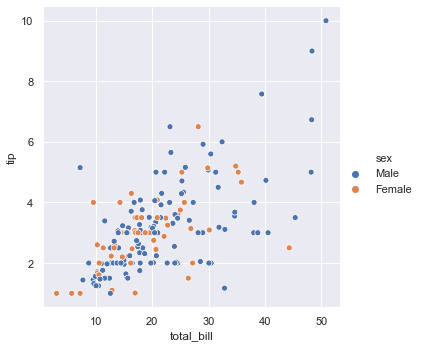

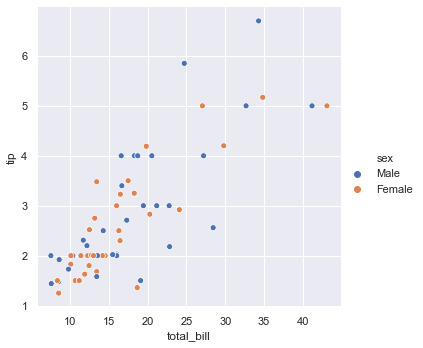

In [59]:
din = df.loc[(df.time=="Dinner")]
sns.relplot("total_bill", "tip", hue = "sex", data=din);

lun = df.loc[(df.time=="Lunch")]
sns.relplot("total_bill", "tip", hue = "sex", data=lun);

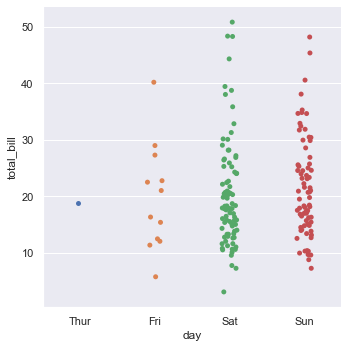

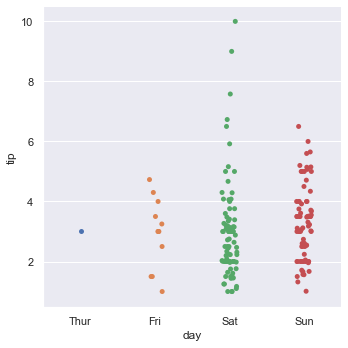

In [7]:
sns.catplot(x="day", y="total_bill", data=din);

sns.catplot(x="day", y="tip", data=din);

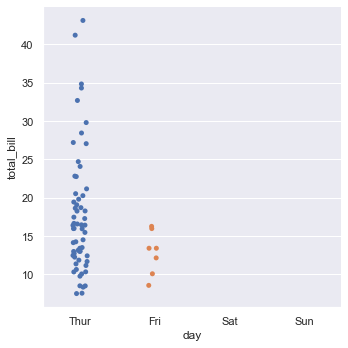

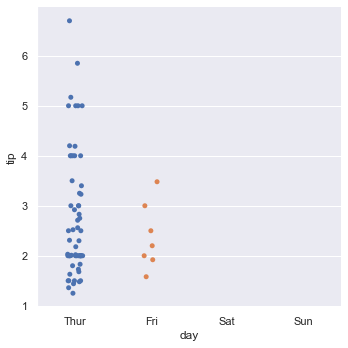

In [12]:
sns.catplot(x="day", y="total_bill", data=lun);

sns.catplot(x="day", y="tip", data=lun);

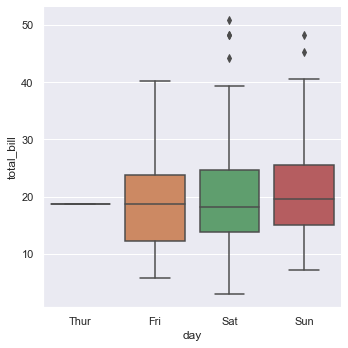

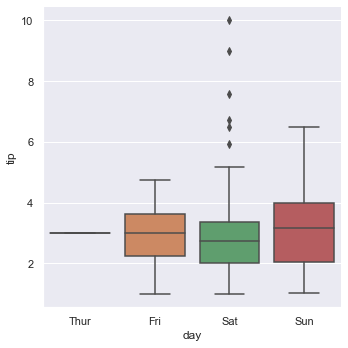

In [11]:
sns.catplot(x="day", y="total_bill", kind="box", data=din);

sns.catplot(x="day", y="tip", kind="box", data=din);

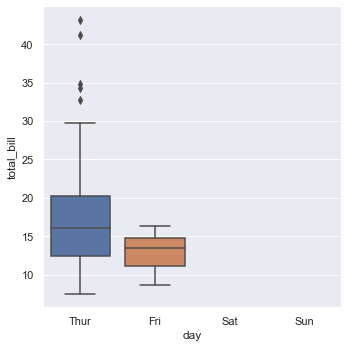

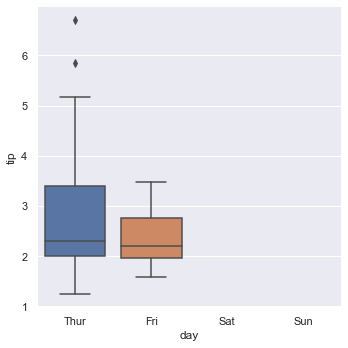

In [13]:
sns.catplot(x="day", y="total_bill", kind="box", data=lun);

sns.catplot(x="day", y="tip", kind="box", data=lun);

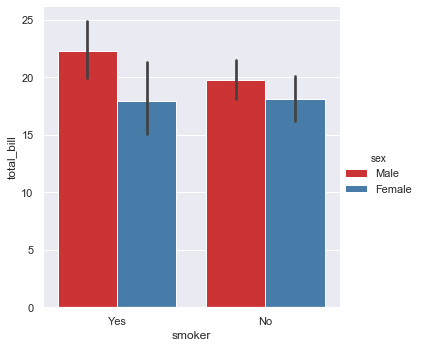

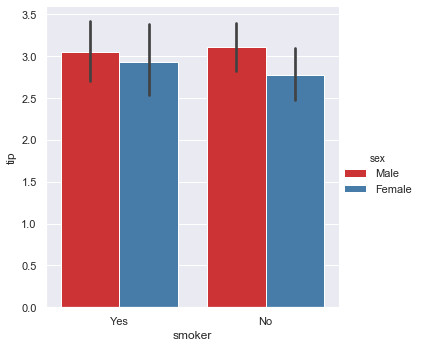

In [58]:
# bar chart of total bill differentiating between male/female smokers
sns.catplot(x="smoker", y="total_bill", hue="sex", kind="bar", data=tips, palette="Set1");

# bar chart of tip differentiating between male/female smokers
sns.catplot(x="smoker", y="tip", hue="sex", kind="bar", data=tips, palette="Set1");

Here we can see that male smokers have spent more than male non-smokers but tip less. Alternatively female smokers and non-smokers have spent roughly the same but smokers tipped slightly more.

## Smoker 

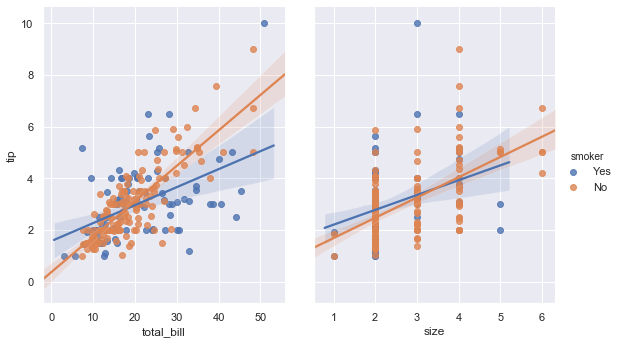

In [55]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");

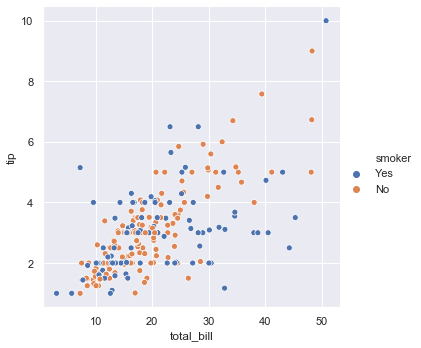

In [11]:
# Scatterplot of 3 dimensions of data, total bill, tip, and whether the customer was a smoker 
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

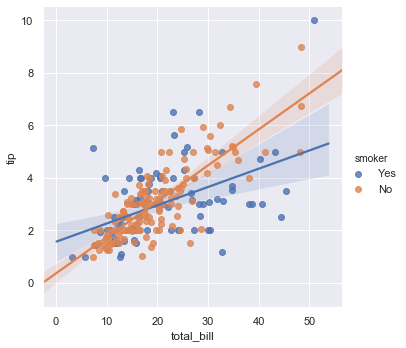

In [12]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

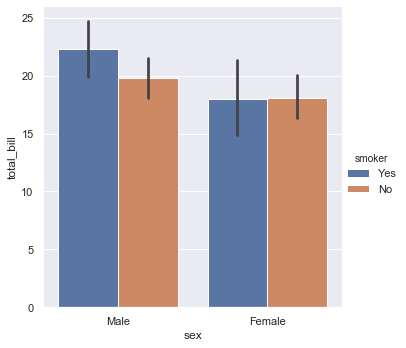

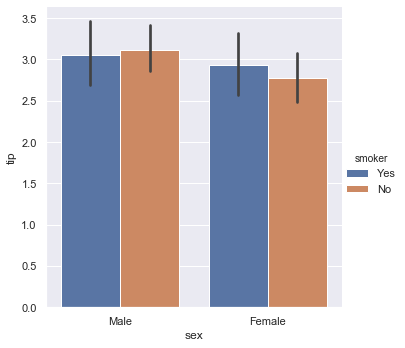

In [50]:
# Bar chart of male and female tips differenciating between smoker and non-smoker
sns.catplot(x="sex", y="total_bill", hue="smoker", kind=("bar"), data=tips);

sns.catplot(x="sex", y="tip", hue="smoker", kind=("bar"), data=tips);

## Party Size

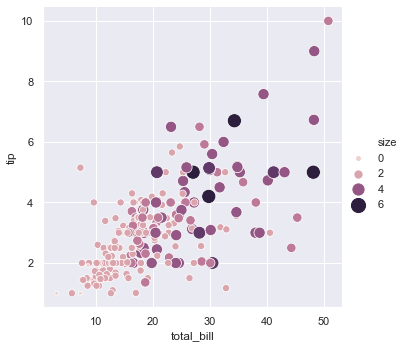

In [13]:
# Scatterplot with part size as third dimension
sns.relplot(x="total_bill", y="tip", hue="size", size="size", sizes=(15, 200), data=tips);

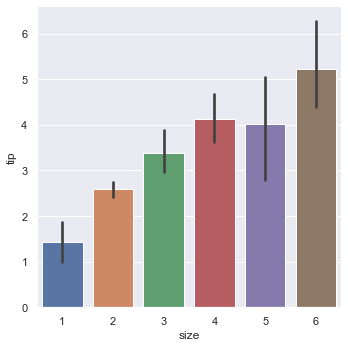

In [37]:
# scatterplot of tips based on party size 
sns.catplot(x="size", y="tip", kind=("bar"), data=tips);

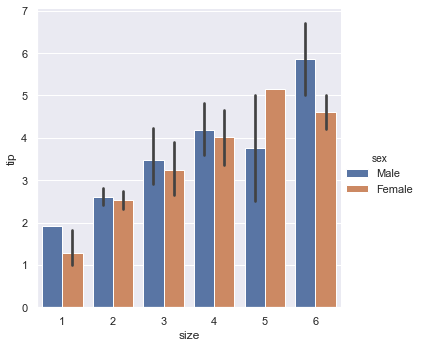

In [88]:
sns.catplot(x="size", y="tip", kind=("bar"), hue="sex", data=tips);

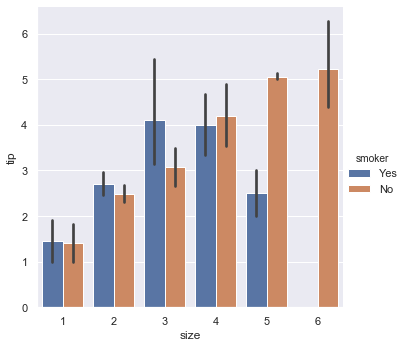

In [89]:
sns.catplot(x="size", y="tip", kind=("bar"), hue="smoker", data=tips);

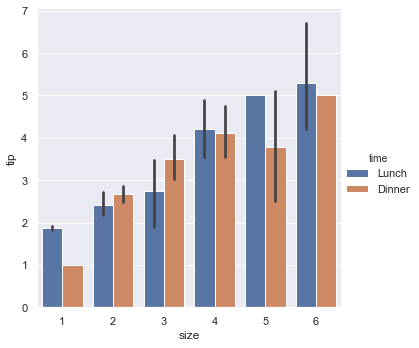

In [90]:
sns.catplot(x="size", y="tip", kind=("bar"), hue="time", data=tips);

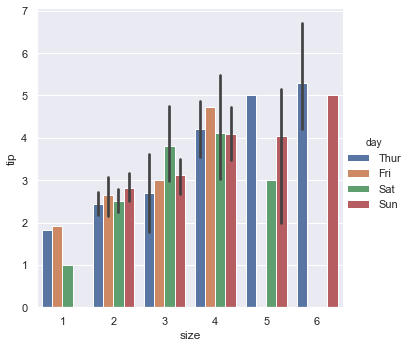

In [91]:
sns.catplot(x="size", y="tip", kind=("bar"), hue="day", data=tips);

## Time

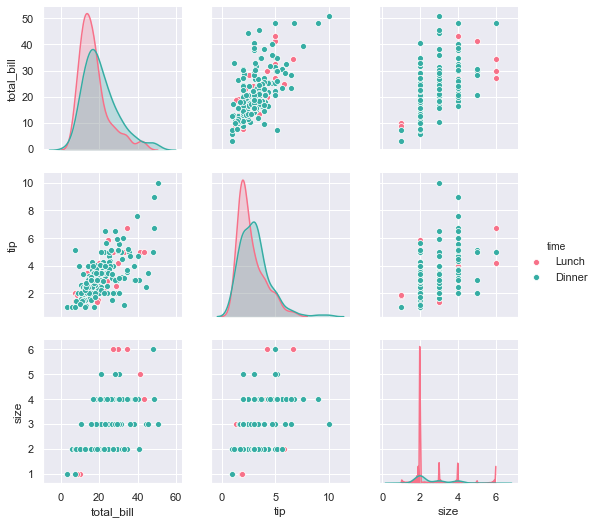

In [15]:
sns.pairplot(tips, hue="time", palette="husl");

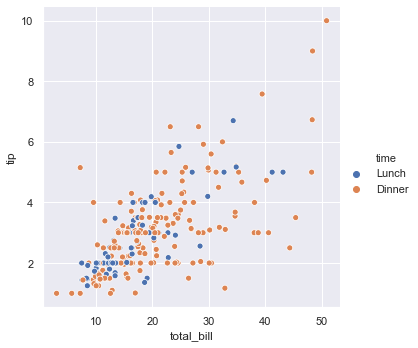

In [85]:
sns.relplot(x="total_bill", y="tip", hue="time", data=tips);

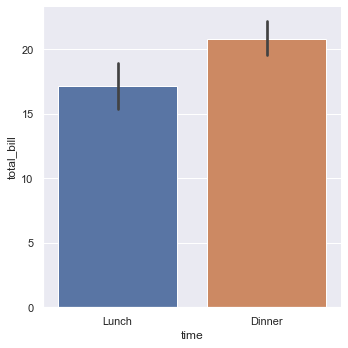

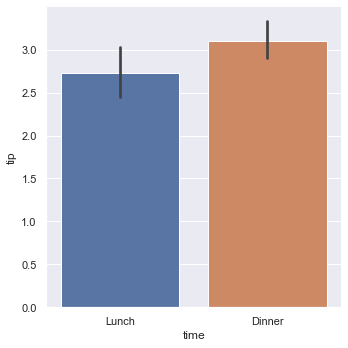

In [67]:
sns.catplot(x="time", y="total_bill", kind=("bar"), data=tips);

sns.catplot(x="time", y="tip", kind=("bar"), data=tips);

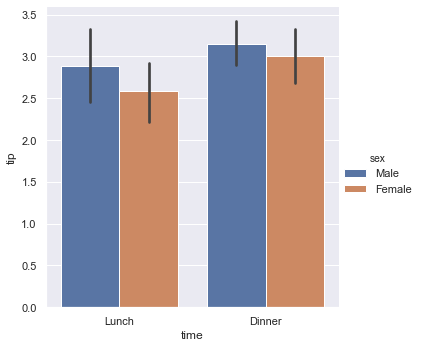

In [92]:
sns.catplot(x="time", y="tip", kind=("bar"), hue="sex", data=tips);

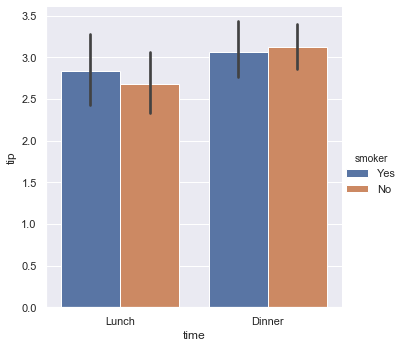

In [93]:
sns.catplot(x="time", y="tip", kind=("bar"), hue="smoker", data=tips);

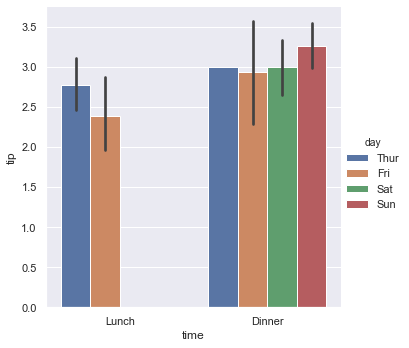

In [94]:
sns.catplot(x="time", y="tip", kind=("bar"), hue="day", data=tips);

## Day

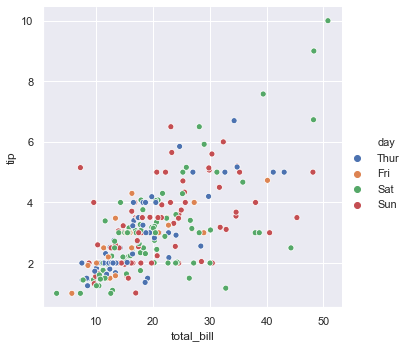

In [86]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips);

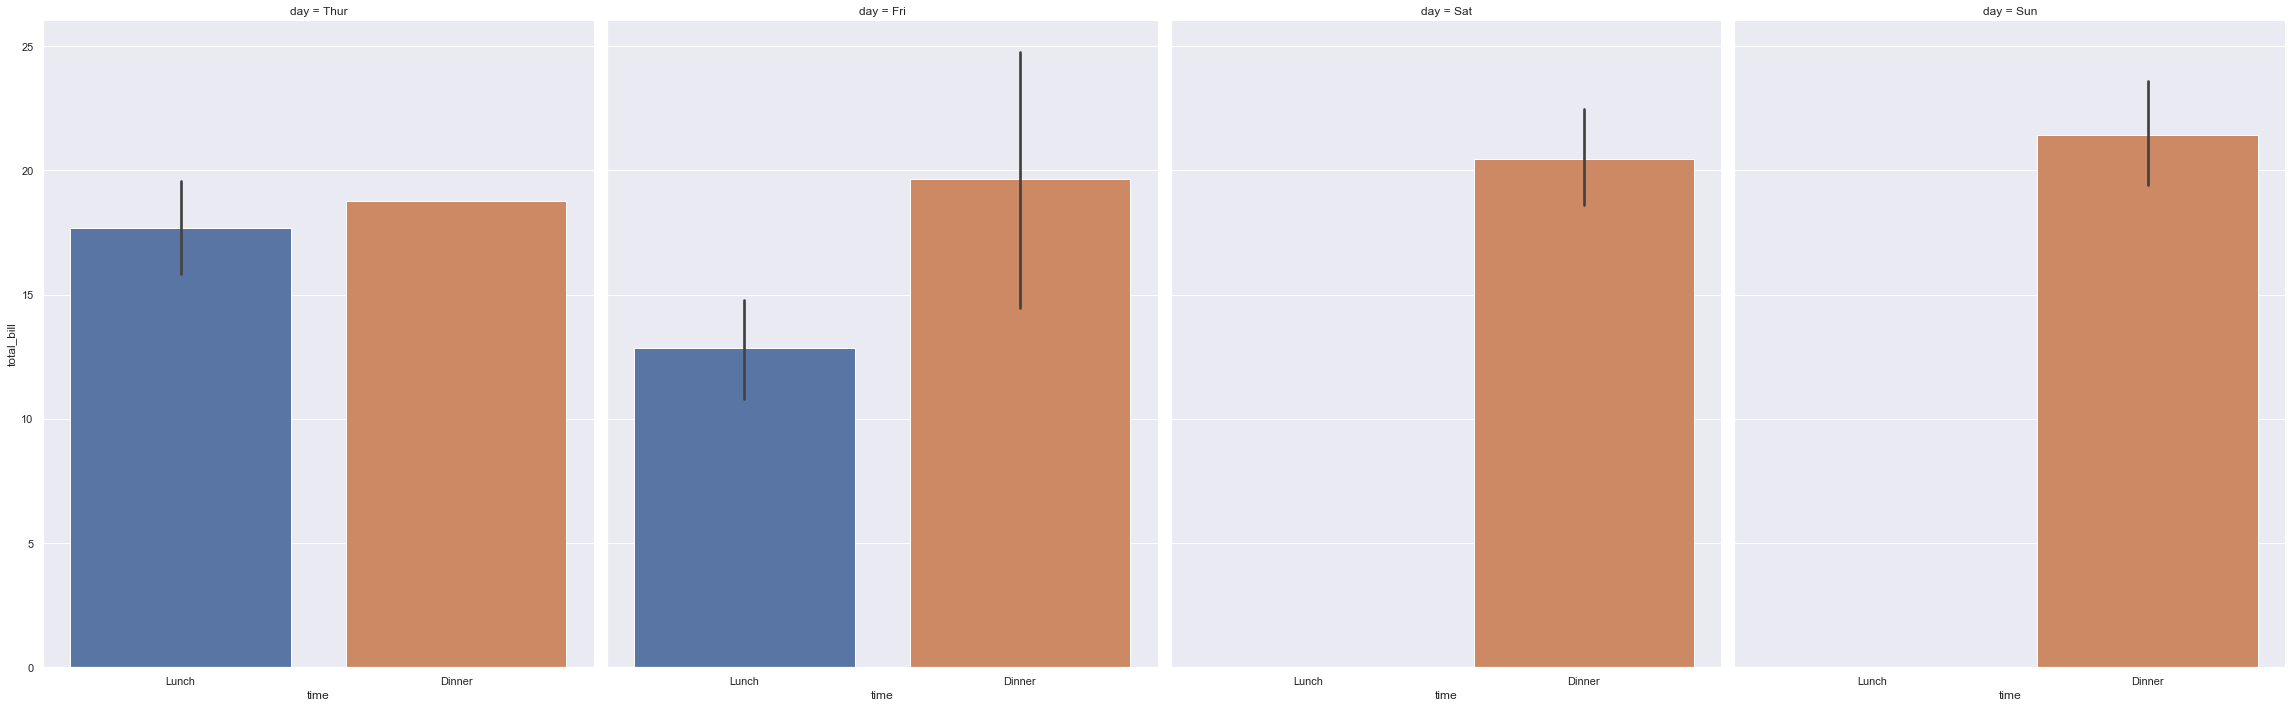

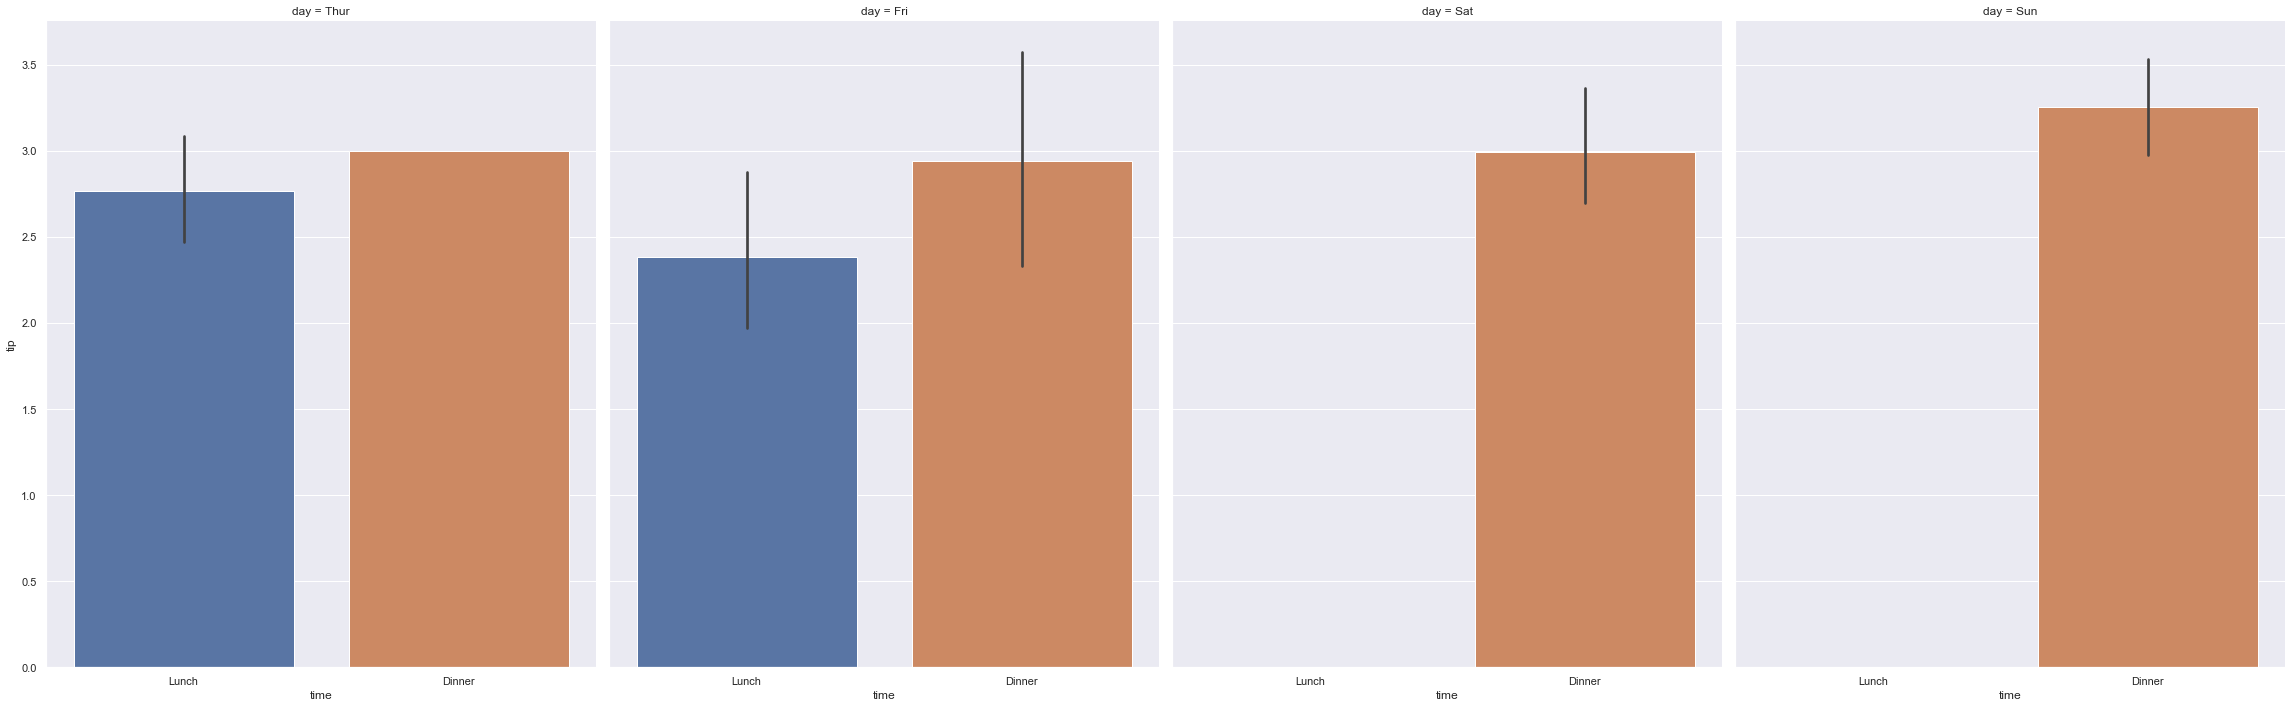

In [72]:
sns.catplot(x="time", y="total_bill", col="day", kind=("bar"), height=10, aspect=.8, data=tips);

sns.catplot(x="time", y="tip", col="day", kind=("bar"), height=10, aspect=.8, data=tips);



## Pandas

In [30]:
# created pivot table of dataset
fp = tips.pivot_table(index='day', columns='size', values='tip')

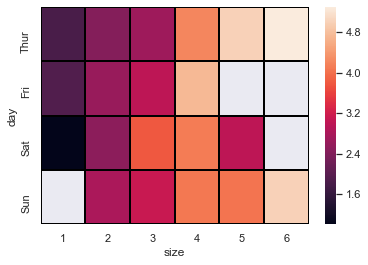

In [29]:
# heatmp of day, size, and tip
sns.heatmap(fp, linecolor='black', linewidth=1)

In [31]:
tc = tips.corr()

In [32]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


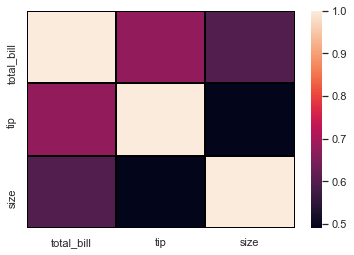

In [33]:
sns.heatmap(tc, linecolor='black', linewidth=1)